<a href="https://colab.research.google.com/github/lacastanop/se-alesys/blob/main/parcial1_punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discusión sobre el Muestreo:
El muestreo es el proceso de convertir una señal continua en una señal discreta tomando muestras a intervalos regulares de tiempo. En este caso, se ha elegido una frecuencia de muestreo de 11000 Hz, lo cual es crítico ya que la señal contiene una frecuencia máxima de 5500 Hz (debido al término
10 cos(11000) 10cos(11000πt)). De acuerdo con el teorema de muestreo de Nyquist, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima para evitar el aliasing y permitir una reconstrucción perfecta de la señal original. Aquí, el muestreo se ha realizado correctamente ya que 11000 Hz es exactamente el doble de la frecuencia máxima presente en la señal.

Discusión sobre la Cuantización:
La cuantización implica convertir cada muestra discreta, que puede tener cualquier valor en un rango continuo, en un valor de un conjunto finito de niveles discretos. Esto es común en la conversión analógica a digital donde la señal debe ajustarse a los niveles que puede representar digitalmente un sistema. Con un conversor de 8 bits, hay 256 niveles posibles de cuantización. Esto suele resultar en un error de cuantización, que es la diferencia entre el valor real y el valor cuantizado. En la gráfica proporcionada, los niveles de cuantización son visibles como saltos discretos en la amplitud de la señal, representados por puntos rojos. Una cuantización con más bits reduciría la magnitud de estos saltos y produciría una señal cuantizada que se asemeja más estrechamente a la señal continua original.

Conclusión:
La señal muestreada muestra una buena representación de la señal continua original debido a una adecuada frecuencia de muestreo. La señal cuantizada, sin embargo, muestra variaciones debido a la limitación de niveles impuesta por el proceso de cuantización. Esto puede ser aceptable dependiendo de la aplicación y los requisitos del sistema. Por ejemplo, para aplicaciones de audio, una cuantización de 8 bits podría no ser suficiente para una calidad de sonido alta, mientras que para otros usos, como el control de procesos o aplicaciones de baja fidelidad, podría ser completamente adecuada.

La calidad de la cuantización puede mejorarse aumentando el número de bits del cuantizador, lo cual incrementaría la cantidad de niveles discretos y reduciría el error de cuantización. Además, técnicas como el sobremuestreo y el dithering pueden ayudar a reducir el impacto del error de cuantización.

En resumen, la gráfica demuestra los efectos fundamentales del muestreo y la cuantización en señales digitales y resalta la importancia de seleccionar apropiadamente los parámetros del sistema de muestreo y cuantización para cumplir con los requisitos de la aplicación específica.

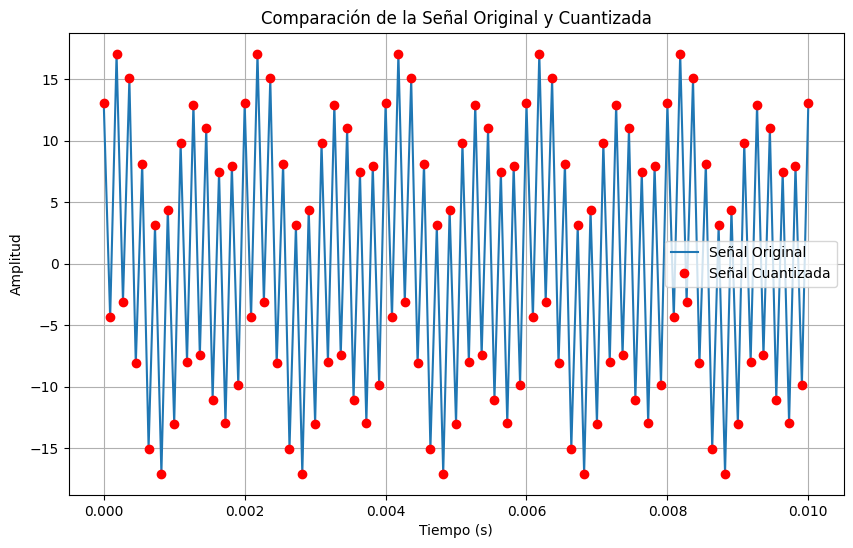

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 11000  # Frecuencia de muestreo en Hz
t = np.arange(0, 0.01, 1/fs)  # Tiempo de muestreo de 1 segundo

# Señal x(t) muestreada
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Parámetros de la cuantización
nbits = 8  # Aumentar número de bits
niveles = 2 ** nbits  # Número de niveles de cuantización
y_min, y_max = np.min(x_t), np.max(x_t)  # Límites para la cuantización

# Cuantización de la señal
y_norm = (x_t - y_min) / (y_max - y_min)  # Normalizar la señal al rango [0, 1]
y_cuantizada = np.round(y_norm * (niveles - 1)) / (niveles - 1)  # Cuantización
y_cuantizada = y_cuantizada * (y_max - y_min) + y_min  # Escala de vuelta al rango original

# Gráfico de la señal original y cuantizada
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Señal Original')
plt.plot(t, y_cuantizada, 'ro', label='Señal Cuantizada')  # Cambiado a puntos
plt.title('Comparación de la Señal Original y Cuantizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()
